### Read libraries

In [1]:
import numpy as np
import pandas as pd
import pyspark
import os
import urllib
import sys

from pyspark.sql.functions import *
from pyspark.ml.regression import *
from pyspark.ml.evaluation import *
from pyspark.ml.feature import *

### About Dataset

Dataset Naming

    The name for this dataset is simply boston. It has two prototasks: nox, in which the nitrous oxide level is to be predicted; and price, in which the median value of a home is to be predicted

Number of Cases
    
    The dataset contains a total of 506 cases.

-Variables
    
    There are 14 attributes in each case of the dataset. They are:
    
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per 10,000 usd
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in 1000's usd


### Read Data

In [2]:
from pyspark import SparkConf, SparkContext
from pyspark.sql import SQLContext
sc= SparkContext()
sqlContext = SQLContext(sc)

house_df = sqlContext.read.format('com.databricks.spark.csv').options(header='true', inferschema='true').load('boston.csv')
house_df.take(1)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/15 07:25:35 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


22/08/15 07:25:43 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
 Schema: _c0, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
Expected: _c0 but found: 
CSV file: file:///Users/sadpasha1/SP_DEV/Marcel%20Classes/Ex_Files_Spark_ML_AI/Exercise%20Files/Ch01/01_04/boston.csv


[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

In [3]:
house_df.show(5)

22/08/15 07:26:10 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: , crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
 Schema: _c0, crim, zn, indus, chas, nox, rm, age, dis, rad, tax, ptratio, black, lstat, medv
Expected: _c0 but found: 
CSV file: file:///Users/sadpasha1/SP_DEV/Marcel%20Classes/Ex_Files_Spark_ML_AI/Exercise%20Files/Ch01/01_04/boston.csv
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|_c0|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio| black|lstat|medv|
+---+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|  1|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|  2|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|  3|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|  4|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|22

### EDA

In [4]:
house_df.cache()
house_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- crim: double (nullable = true)
 |-- zn: double (nullable = true)
 |-- indus: double (nullable = true)
 |-- chas: integer (nullable = true)
 |-- nox: double (nullable = true)
 |-- rm: double (nullable = true)
 |-- age: double (nullable = true)
 |-- dis: double (nullable = true)
 |-- rad: integer (nullable = true)
 |-- tax: integer (nullable = true)
 |-- ptratio: double (nullable = true)
 |-- black: double (nullable = true)
 |-- lstat: double (nullable = true)
 |-- medv: double (nullable = true)



In [6]:
house_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
_c0,506,253.5,146.2138844296259,1,506
crim,506,3.6135235573122535,8.601545105332491,0.00632,88.9762
zn,506,11.363636363636363,23.32245299451514,0.0,100.0
indus,506,11.136778656126504,6.860352940897589,0.46,27.74
chas,506,0.0691699604743083,0.2539940413404101,0,1
nox,506,0.5546950592885372,0.11587767566755584,0.385,0.871
rm,506,6.284634387351787,0.7026171434153232,3.561,8.78
age,506,68.57490118577078,28.148861406903595,2.9,100.0
dis,506,3.795042687747034,2.10571012662761,1.1296,12.1265


Scatter matrix is a great way to roughly determine if we have a linear correlation between multiple independent variables

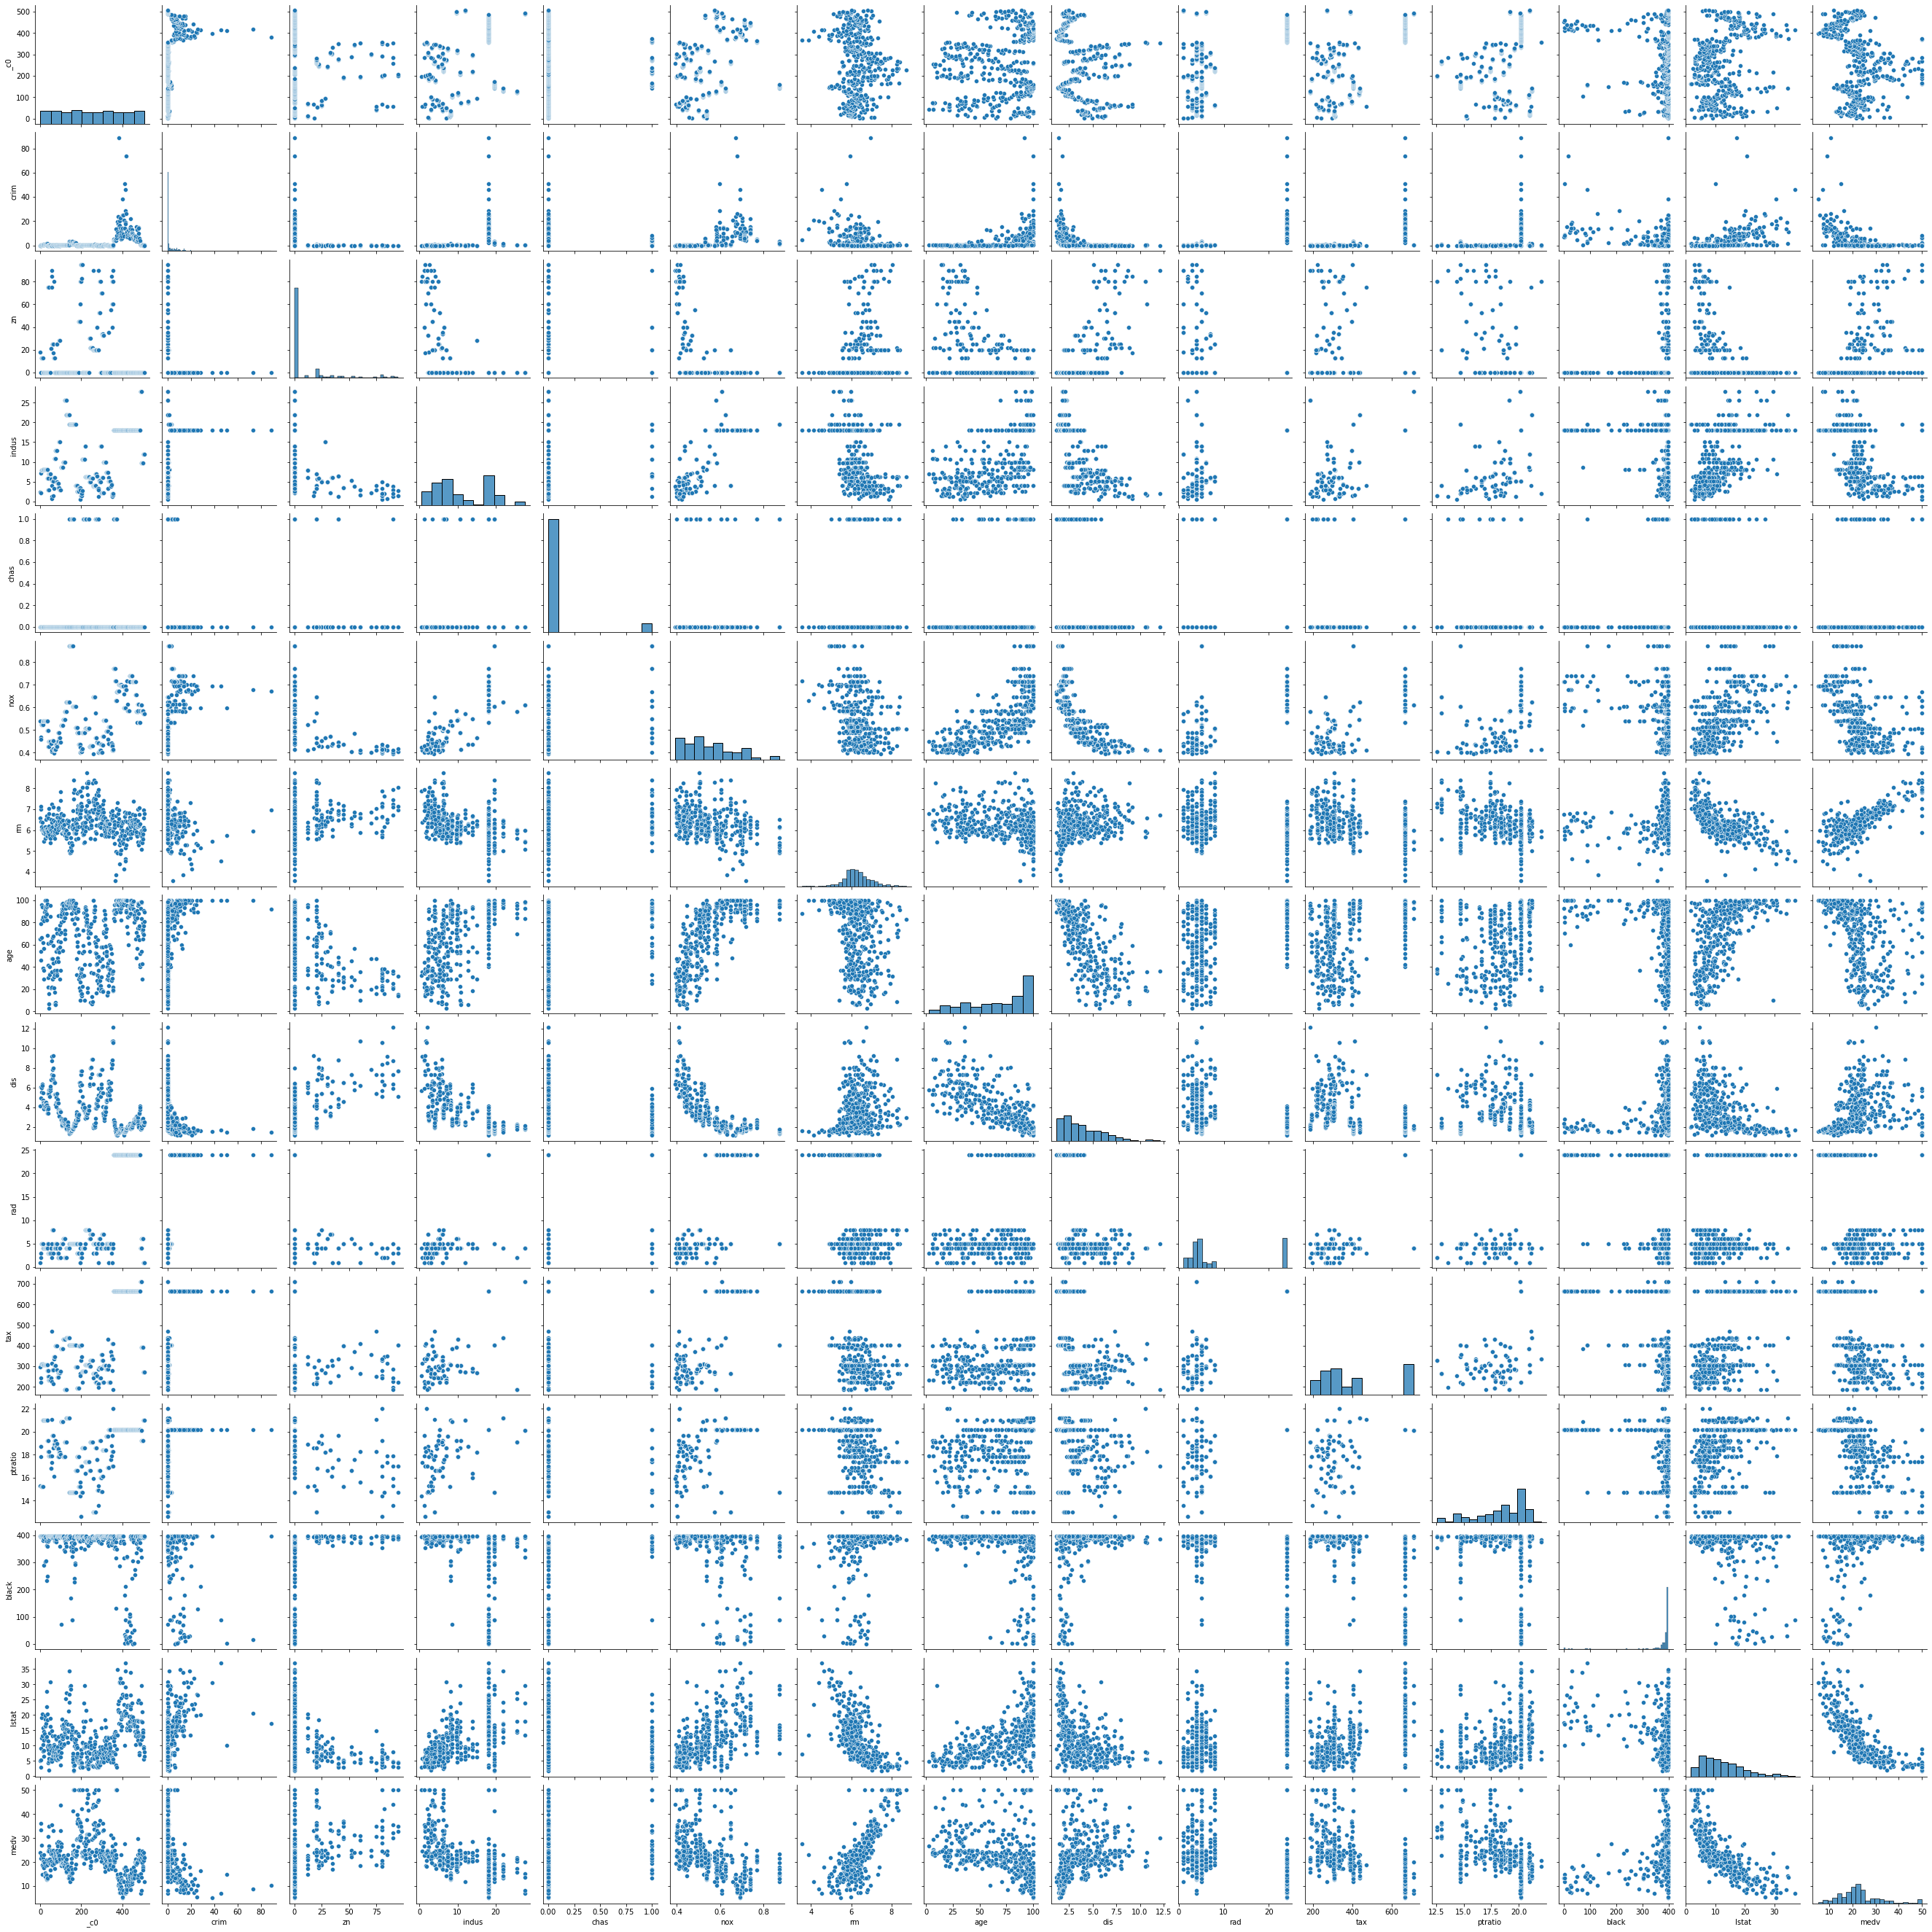

In [8]:
import pandas as pd
import seaborn as sns

numeric_features = [t[0] for t in house_df.dtypes if t[1] == 'int' or t[1] == 'double']
sampled_data = house_df.select(numeric_features).sample(False, 0.8).toPandas()

sns.pairplot(sampled_data)

Let’s find correlation between independent variables and target variable.

<AxesSubplot:>

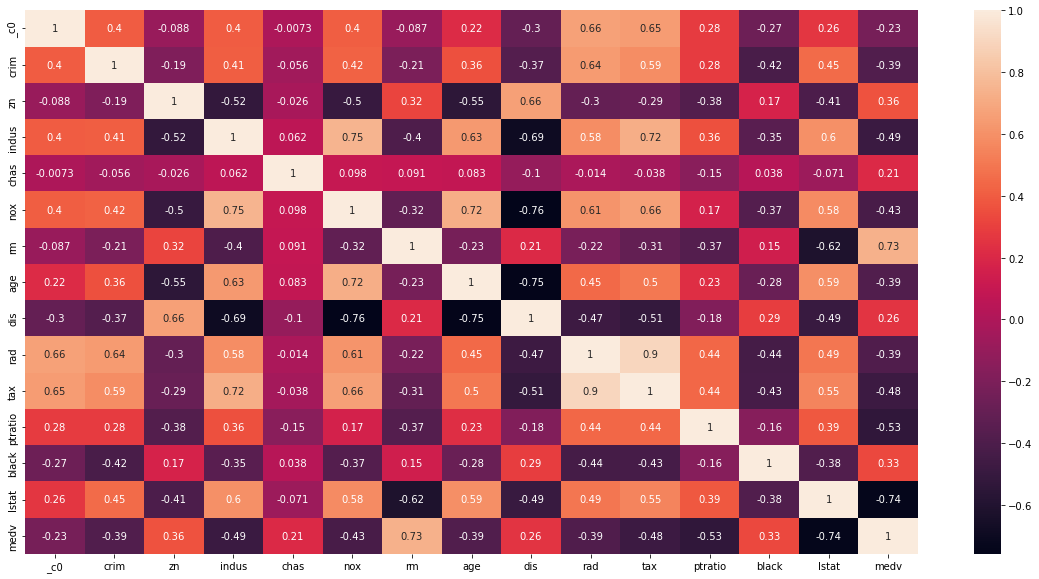

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(sampled_data.corr(), 
            annot=True,
           )

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; for example, the median value tends to go up when the number of rooms goes up. When the coefficient is close to –1, it means that there is a strong negative correlation; the median value tends to go down when the percentage of the lower status of the population goes up. Finally, coefficients close to zero mean that there is no linear correlation.

We are going to keep all the variables, for now.

Prepare data for Machine Learning. And we need two columns only — features and label(“MV”):

### Data preprocessing

In [17]:
data = house_df

In [18]:
# vectorize all numerical columns into a single feature column
feature_cols = data.columns[:-1]
assembler = VectorAssembler(inputCols=feature_cols, 
                            outputCol='features')
data = assembler.transform(data)

# only select the features and label column
data = data.select(['features', 'medv'])
print("Reading for machine learning")
data.show(10)

Reading for machine learning
22/08/15 07:36:05 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.
+--------------------+----+
|            features|medv|
+--------------------+----+
|[1.0,0.00632,18.0...|24.0|
|[2.0,0.02731,0.0,...|21.6|
|[3.0,0.02729,0.0,...|34.7|
|[4.0,0.03237,0.0,...|33.4|
|[5.0,0.06905,0.0,...|36.2|
|[6.0,0.02985,0.0,...|28.7|
|[7.0,0.08829,12.5...|22.9|
|[8.0,0.14455,12.5...|27.1|
|[9.0,0.21124,12.5...|16.5|
|[10.0,0.17004,12....|18.9|
+--------------------+----+
only showing top 10 rows



In [19]:
data.take(1)

[Row(features=DenseVector([1.0, 0.0063, 18.0, 2.31, 0.0, 0.538, 6.575, 65.2, 4.09, 1.0, 296.0, 15.3, 396.9, 4.98]), medv=24.0)]

### Data Splitting

In [20]:

train, test = data.randomSplit([0.70, 0.30])

train.show(5)
test.show(5)

train.count(), test.count()

+--------------------+----+
|            features|medv|
+--------------------+----+
|[1.0,0.00632,18.0...|24.0|
|[2.0,0.02731,0.0,...|21.6|
|[3.0,0.02729,0.0,...|34.7|
|[6.0,0.02985,0.0,...|28.7|
|[7.0,0.08829,12.5...|22.9|
+--------------------+----+
only showing top 5 rows

+--------------------+----+
|            features|medv|
+--------------------+----+
|[4.0,0.03237,0.0,...|33.4|
|[5.0,0.06905,0.0,...|36.2|
|[8.0,0.14455,12.5...|27.1|
|[15.0,0.63796,0.0...|18.2|
|[22.0,0.85204,0.0...|19.6|
+--------------------+----+
only showing top 5 rows



(333, 173)

### Model Building

### Linear Regression

In [33]:
lr = LinearRegression(featuresCol = 'features', 
                      labelCol='medv', 
                      maxIter=10, 
                      regParam=5, 
                      elasticNetParam=0.8)

lr_model = lr.fit(train)

print("Coefficients: " + str(lr_model.coefficients))
print()
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.0,0.0,0.0,0.0,0.0,0.0,1.6960734922471592,0.0,0.0,0.0,0.0,0.0,0.0,-0.2574833190906789]

Intercept: 15.132159440780388


NOTE: REG PARAM HAS BEEN SET TO 5 AFTER TESTING WITH VARIOUS VALUES

In [34]:
trainingSummary = lr_model.summary
print("RMSE: %f" % trainingSummary.rootMeanSquaredError)
print("r2: %f" % trainingSummary.r2)

RMSE: 7.241274
r2: 0.393691


RMSE measures the differences between predicted values by the model and the actual values. However, RMSE alone is meaningless until we compare with the actual “MV” value, such as mean, min and max. After such comparison, our RMSE looks pretty good

In [35]:
train.describe().show()

+-------+------------------+
|summary|              medv|
+-------+------------------+
|  count|               333|
|   mean|22.514414414414414|
| stddev|  9.31367222925568|
|    min|               5.0|
|    max|              50.0|
+-------+------------------+



R squared at 0.39 indicates that in our model, approximate 39% of the variability in “MV” can be explained using the model. This is in align with the result from Scikit-Learn. It is not bad. However, we must be cautious that the performance on the training set may not a good approximation of the performance on the test set.



In [37]:
lr_predictions = lr_model.transform(test)
lr_predictions.select("prediction","medv","features").show(5)


lr_evaluator = RegressionEvaluator(predictionCol="prediction",
                                 labelCol="medv",
                                   metricName="r2")
print("R Squared (R2) on test data = %g" % lr_evaluator.evaluate(lr_predictions))

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 26.24428078139941|33.4|[4.0,0.03237,0.0,...|
|25.881610599117515|36.2|[5.0,0.06905,0.0,...|
|20.669519474343353|27.1|[8.0,0.14455,12.5...|
|22.829644595648706|18.2|[15.0,0.63796,0.0...|
|  21.6882435190106|19.6|[22.0,0.85204,0.0...|
+------------------+----+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.371883


In [38]:
test_result = lr_model.evaluate(test)
print("Root Mean Squared Error (RMSE) on test data = %g" % test_result.rootMeanSquaredError)

Root Mean Squared Error (RMSE) on test data = 7.10832


RMSE in training is 7.24 while in test is 7.108, this is good

In [39]:
print("numIterations: %d" % trainingSummary.totalIterations)
print("objectiveHistory: %s" % str(trainingSummary.objectiveHistory))
trainingSummary.residuals.show()

numIterations: 10
objectiveHistory: [0.49999999999999956, 0.48949695598571014, 0.45862147205751447, 0.45225530221452137, 0.4517168151617632, 0.4511930252472329, 0.45113567002921173, 0.45110813917618986, 0.45110037260012514, 0.45109821324014066, 0.45109797856965655]
+--------------------+
|           residuals|
+--------------------+
| -1.0015757232338771|
|  -2.069249798010592|
|   8.419210293359214|
|   4.003576096532814|
|  0.7715643801268293|
| -0.4762735352401215|
| -2.0124199317817215|
|  -5.682486225436136|
| -3.0070614113602616|
|  0.6247267062906552|
| -2.6952884304697307|
|  -2.946168481852265|
|-0.40411537765060856|
|  -4.014359368280612|
| -1.1759564143108534|
| -3.7411604915370127|
|  -5.566989425310995|
|  -5.529355096784933|
|  -5.372666267690427|
| -6.4774253256851235|
+--------------------+
only showing top 20 rows



Using our Linear Regression model to make some predictions:

In [40]:
predictions = lr_model.transform(test)
predictions.select("prediction","medv","features").show()

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 26.24428078139941|33.4|[4.0,0.03237,0.0,...|
|25.881610599117515|36.2|[5.0,0.06905,0.0,...|
|20.669519474343353|27.1|[8.0,0.14455,12.5...|
|22.829644595648706|18.2|[15.0,0.63796,0.0...|
|  21.6882435190106|19.6|[22.0,0.85204,0.0...|
|20.982720707674495|15.6|[25.0,0.75026,0.0...|
| 20.93900409451203|14.8|[28.0,0.95577,0.0...|
|22.852370288564998|18.4|[29.0,0.77299,0.0...|
|19.002704290539064|12.7|[31.0,1.13081,0.0...|
| 22.70252494148501|18.9|[36.0,0.06417,0.0...|
|22.796060662001015|21.0|[38.0,0.08014,0.0...|
| 25.20543618367867|30.8|[40.0,0.02763,75....|
| 24.09925873053627|25.3|[43.0,0.1415,0.0,...|
|22.140344335812916|19.3|[46.0,0.17142,0.0...|
|20.462333375079975|19.4|[50.0,0.21977,0.0...|
|23.075581146846666|20.5|[52.0,0.04337,21....|
| 26.18850142125388|35.4|[56.0,0.01311,90....|
| 23.78819548167712|23.3|[59.0,0.15445,25....|
| 22.81079082

### Decision Tree Regression

In [41]:

dt = DecisionTreeRegressor(featuresCol ='features', labelCol = 'medv')

dt_model = dt.fit(train)
dt_predictions = dt_model.transform(test)

dt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")

rmse = dt_evaluator.evaluate(dt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

Root Mean Squared Error (RMSE) on test data = 4.75831


In [45]:
dt_model.featureImportances

SparseVector(14, {0: 0.0001, 1: 0.0141, 3: 0.011, 5: 0.0863, 6: 0.609, 7: 0.0026, 8: 0.037, 11: 0.0182, 13: 0.2216})

In [43]:
house_df.take(1)

[Row(_c0=1, crim=0.00632, zn=18.0, indus=2.31, chas=0, nox=0.538, rm=6.575, age=65.2, dis=4.09, rad=1, tax=296, ptratio=15.3, black=396.9, lstat=4.98, medv=24.0)]

Apparently, the number of rooms is the most important feature to predict the house median price in our data

### Gradient Boosted tree Regression

In [46]:

gbt = GBTRegressor(featuresCol = 'features', labelCol = 'medv', maxIter=10)
gbt_model = gbt.fit(train)
gbt_predictions = gbt_model.transform(test)
gbt_predictions.select('prediction', 'medv', 'features').show(5)

gbt_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = gbt_evaluator.evaluate(gbt_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
| 31.33467307244497|33.4|[4.0,0.03237,0.0,...|
| 36.56365797810535|36.2|[5.0,0.06905,0.0,...|
|  15.8691418164158|27.1|[8.0,0.14455,12.5...|
|17.871117992530518|18.2|[15.0,0.63796,0.0...|
| 18.50186269950108|19.6|[22.0,0.85204,0.0...|
+------------------+----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 4.53741


### RandomForest Regression

In [48]:

rf = RandomForestRegressor(featuresCol = 'features', labelCol = 'medv')
rf_model = rf.fit(train)
rf_predictions = rf_model.transform(test)
rf_predictions.select('prediction', 'medv', 'features').show(5)

rf_evaluator = RegressionEvaluator(
    labelCol="medv", predictionCol="prediction", metricName="rmse")
rmse = rf_evaluator.evaluate(rf_predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+------------------+----+--------------------+
|        prediction|medv|            features|
+------------------+----+--------------------+
|30.683146813877613|33.4|[4.0,0.03237,0.0,...|
|   34.256319769723|36.2|[5.0,0.06905,0.0,...|
|18.572046857933305|27.1|[8.0,0.14455,12.5...|
| 20.31001223729407|18.2|[15.0,0.63796,0.0...|
|19.365788417691316|19.6|[22.0,0.85204,0.0...|
+------------------+----+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 3.62622


Best Performing model is RandomForest Regression